In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
import seaborn as sns

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Identifying the missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


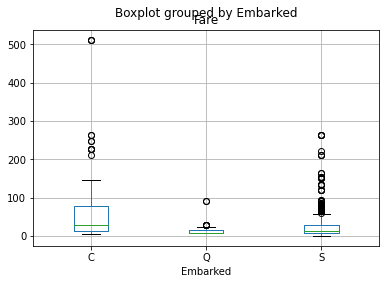

In [9]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

In [10]:
train_df['Embarked'] = train_df['Embarked'].fillna('C')

In [14]:
#Mean Imputation for Age
train_df['Age'] = train_df['Age'].fillna(np.mean(train_df['Age']))

In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
#Checking for duplicates
duplicated = train_df[train_df.duplicated()]

In [22]:
duplicated.shape

(0, 12)

In [39]:
#Function to identify ourliers

def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c], 25)
        #2nd quartile
        Q2 = np.percentile(df[c], 50)
        #3rd quartile
        Q3 = np.percentile(df[c], 75)
        #IQR
        IQR = Q3 - Q1
        #outlier step
        outlier_step = IQR * 1.5
        #detect outliers and their indices
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [42]:
train_df.loc[detect_outliers(train_df, ['Age','SibSp', 'Parch', 'Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,NaN,Q
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.000000,4,1,3101295,39.6875,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.000000,0,1,PC 17582,153.4625,C125,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,CA 2144,46.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000000,1,1,13567,79.2000,B41,C


In [43]:
train_df = train_df.drop(detect_outliers(train_df, ['Age','SibSp', 'Parch', 'Fare']), axis=0).reset_index(drop = True)

In [46]:
train_df.shape

(866, 12)

In [56]:
def bar_plot(variable):
    #get feature
    var = train_df[variable]
    #count no of features
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print(f'{variable}:\n{varValue}')

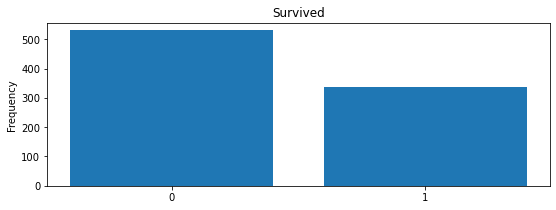

Survived:
0    530
1    336
Name: Survived, dtype: int64


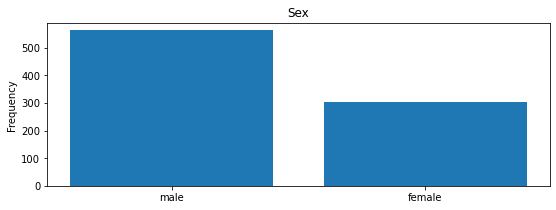

Sex:
male      562
female    304
Name: Sex, dtype: int64


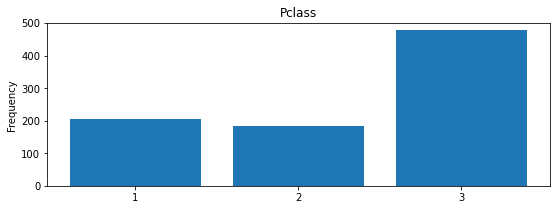

Pclass:
3    477
1    205
2    184
Name: Pclass, dtype: int64


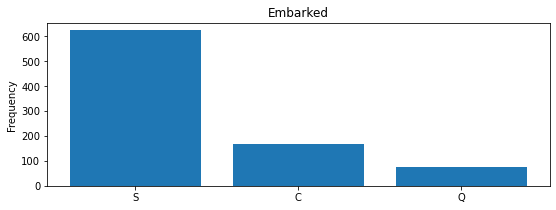

Embarked:
S    623
C    167
Q     76
Name: Embarked, dtype: int64


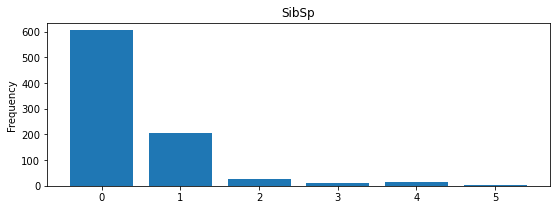

SibSp:
0    605
1    204
2     28
4     14
3     11
5      4
Name: SibSp, dtype: int64


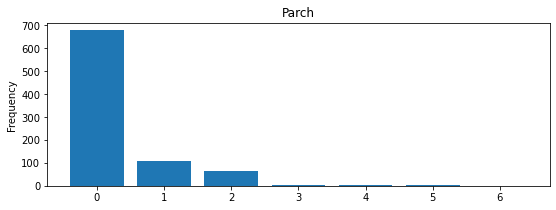

Parch:
0    678
1    110
2     64
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64


In [57]:
category1 = ['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
for c in category1:
    bar_plot(c)

In [58]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel('frequency')
    plt.title(f'{variable} distribution with hist')
    plt.show()
    

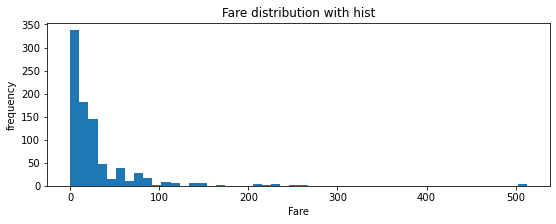

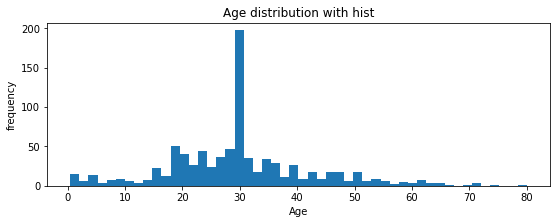

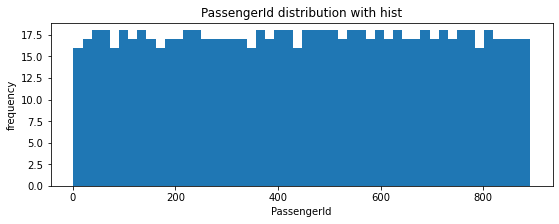

In [60]:
numericVar = ['Fare', 'Age', 'PassengerId']
for n in numericVar:
    plot_hist(n)

In [85]:
#pclass vs survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.634146
1,2,0.472826
2,3,0.249476


In [86]:
#sex vs survived
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.753289
1,male,0.190391


In [87]:
#SibSp vs survived
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.539216
2,2,0.464286
0,0,0.343802
4,4,0.214286
3,3,0.181818
5,5,0.000000


In [89]:
#Parch vs survived
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.578125
1,1,0.563636
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [90]:
#Embarked vs survived
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.556886
1,Q,0.394737
2,S,0.341894


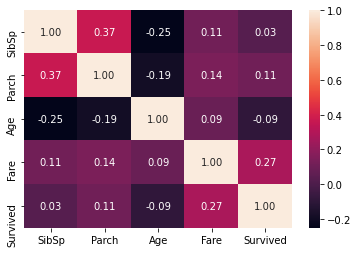

In [101]:
#Identifying the correlation
list1 = ['SibSp', 'Parch', 'Age', 'Fare', 'Survived']
sns.heatmap(train_df[list1].corr(), annot=True, fmt='.2f')
plt.show()